# PHYS 250 Computational Midterm Exam

**Notes:**

1. You have 2 hours to do the exam.  Your solution must be uploaded to Canvas (exactly as is done for the prelabs and labs) as a notebook file with its name unchanged. **Late exams will not be accepted.** A little bit of extra time has been allotted on Canvas for you to turn it in before it will claim the exam is late. This is meant to insure that you have a full 2 hours to work on the exam, and then a little bit of time to turn in it. It is not extra time to work on the exam!
2. You must work on the exam yourself. It must all be your work. You are free to use resources from the course (prelabs, labs, and examples) as you wish **but not other people** (this even excludes people not in the course). I am trying to be flexible in terms of when people can work on this portion of the exam.  This means different students will be working on the exam at different times. **Do not discuss the exam with other students until everyone has completed it.**
3. The exam is meant to be completed in the allotted time. I may have misjudged the amount of time the questions will take. Keep in mind that everyone is in the same situation as yourself. If the exam is too long everyone will suffer similarly and I will take that into account when assigning grades. It is best to look at all the problems and do as much work as you can starting with the problem you are most comfortable with.
4. The points for each problem are given below. You can use this information to decide how to apportion your time working on the problems.
5. When I ask for descriptions include all the information you think is relevant to convince me that (a) you know how to solve the problem, and (b) can be used to reproduce the results if someone else in the class were given the description. The more clear these descriptions are the better chance I have in understanding what you have done and assigning partial credit. When making nice plots you must follow all the good practices discussed and used in the labs.
6. **Restart the kernel and rerun the notebook** before turning it in. Part of the grading process is rerunning the notebook. The state you left the notebook in is not the final state.  It is the rerun notebook that will be graded, not the static version as turned in. See Lab00 to remind yourself of what is expected.
7. **Read the questions carefully.** There is important information given in various places in various parts of the problem. Do not skip reading sections, even if they are very small.

## Initialization

Collect all your initialization here.

In [1]:
# YOUR CODE HERE
import numpy as np
import scipy.constants as const
import scipy.optimize as opt
import matplotlib.pyplot as plt
import scipy.special as sf
import scipy.integrate as integ
import scipy.interpolate as interp

import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)


## 1. Critical Mass (10 points)

An important calculation performed during the Manhattan project was the determination of the minimum mass of a radioactive element required for a self-sustained fission reaction. An interesting [video](https://www.youtube.com/watch?v=DIuoFAW9H3E) shows how to determine this critical mass. For a uniform, spherical distribution of some material it is found that the critical radius, $R_c$, (i.e., the smallest radius) which maintains a nuclear reaction in the "advanced solution" satisfies the transcendental equation
$$ \frac{3 R_{c}}{2 \lambda_t} = 1 - \kappa R_c \cot(\kappa R_c), $$
where
$$ \kappa^2 = \frac{3(\nu - 1)}{\lambda_t \lambda_f}, $$
written in terms of parameters determined by the properties of neutrons propagating through the sphere. Here $\lambda_f$ is the fission mean free path (average distance a neutron travels before causing a fission) and $\lambda_t$ is the transport mean free path (similar but now also includes elastic scattering of the neutron).

### Uranium-235

For uranium-235 the relevant parameters are
$$ \lambda_t = 3.596\,\mathrm{cm}, \; \lambda_f = 16.89\,\mathrm{cm}, \; \nu=2.6, \; \rho = 19\,\mathrm{g/cm^3}. $$
(Note that there is an error in the video where the numerical values for $\lambda_t$ and $\lambda_f$ are swapped. He also does not state the density he uses so he arrives at a slightly different answer.)
Calculate and print the critical radius $R_c$ in cm and the critical mass $M_c$ in kg for a uniform sphere of U235.

In [2]:
# YOUR CODE HERE
def rCritSolver(Rc, Lt, Lf, nu, rho):
    
    kappa = np.sqrt(3 * (nu - 1) / (Lt * Lf))
    
    term1 = kappa / np.tan(kappa * Rc)
    
    term2 = 3 / (2 * Lt)
    
    return 1 - Rc * (term1 - term2)

def rCritSolver2(Rc, Lt, Lf, nu, rho):
    
    kappa = np.sqrt(3 * (nu - 1) / (Lt * Lf))
    
    term1 = np.tan(kappa * Rc) / (kappa * Rc)
    
    term2a = (3 * Rc) / (2 * Lt)
    
    term2 = 1 / (1 - term2a)
    
    return term1 - term2
    
LtU = 3.596
LfU = 16.89
nuU = 2.6
rhoU = 19.
Uargs = (LtU, LfU, nuU, rhoU)

rCritU = opt.brentq(rCritSolver, 13, 15, args = Uargs)
mCritU = rhoU * 4 * np.pi * (rCritU ** 3) / 3000

print(f"Radius: {rCritU}, Mass: {mCritU} (I know these are off...)")

Radius: 13.015655186477627, Mass: 175.48512695972283 (I know these are off...)


In [3]:
np.sqrt(3 * (nuU - 1) / (LtU * LfU))

0.28112272400576227

(-10.0, 10.0)

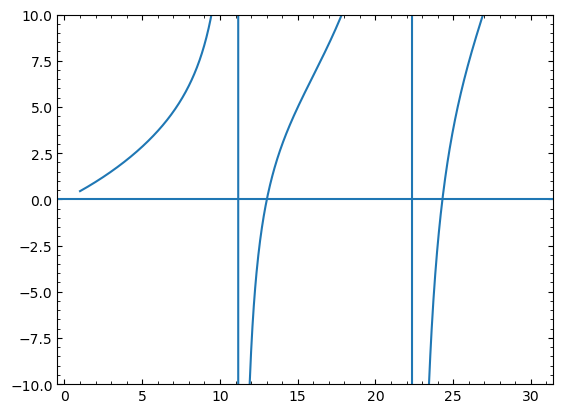

In [4]:
testvalues = np.linspace(1, 30, 1000)
#plt.plot(testvalues, rCritSolver2(testvalues, *Uargs))
plt.plot(testvalues, rCritSolver(testvalues, *Uargs))
plt.axhline()
plt.ylim(-10, 10)

### Plutonium-239

We can repeat the process for plutonium-239. In the video we are given the parameters
$$ \sigma_f = 1.8\times 10^{-24}\,\mathrm{cm^2}, \; \sigma_e = 4.394\times 10^{-24}\,\mathrm{cm^2}, \; \nu = 3.172, \; \rho = 15.6\,\mathrm{g/cm^3}. $$
Here $\sigma_f$ and $\sigma_e$ are cross sections instead of mean free paths. To compute the mean free paths we use
$$ \lambda_f = \frac{A}{\rho N_A \sigma_f} \mbox{ and } \lambda_t = \frac{A}{\rho N_A \sigma_t}, $$
where $\sigma_t = \sigma_f + \sigma_e$, $N_A$ is Avagadro's number, and $A = 239 \, \mathrm{g/mol}$ is the atomic mass of Pu239. 

Calculate and print the mean free paths $\lambda_f$ and $\lambda_t$. Also calculate and print the critical radius $R_c$ in cm and the critical mass $M_c$ in kg for a uniform sphere of Pu239.

In [5]:
# YOUR CODE HERE

## 2. Cosmological Distance (15 points)

In a curved, expanding universe with matter and cosmological constant the dimensionless distance to the last scattering surface, $\chi_{\mathrm{LS}}$, can be written as
$$ \chi_{\mathrm{LS}} = \sqrt{|\Omega_K|} \int_{0}^{z_{\mathrm{LS}}} \frac{\mathrm{d} z}{\sqrt{\Omega_m (1+z)^3 + \Omega_K (1+z)^2 + \Omega_\Lambda}}, $$
where $\Omega_m$ represents the fraction of the critical density of the universe in matter, $\Omega_\Lambda$ the same for the cosmological constant, and $\Omega_K$ the same (at least conceptually) for the curvature. They satisfy the constraint equation
$$ \Omega_m + \Omega_K + \Omega_\Lambda = 1. $$
We will take the redshift of last scattering to be $z_{\mathrm{LS}} = 1090$ for the rest of this problem.
(This distance is in units of the radius of curvature of the universe. You do not need to use that fact, for this exam $\chi_{\mathrm{LS}}$ is a dimensionless number.)

The values of these parameters for our Universe are determined from observations. From the most recent Planck satellite measurements it is deduced that the best fit cosmology satisfies the empirical relationship
$$ \Omega_m = 0.314 - 3.71 \Omega_K $$
for $\Omega_K \leq 0$. (Note: Negative constant curvature means the geometry is spherical.)

We are typically told that this integral cannot be evaluated analytically. (Actually, it can be, at least in the case we will consider here, but we "always" evaluate it numerically.) If $|\Omega_K| \ll 1$ we can approximate the integral. To lowest order in $\Omega_K$ we can show that
$$ \chi_{\mathrm{LS}} \approx 2\sqrt{\frac{|\Omega_K|}{\Omega_m}} \left[ {}_2F_1\!\left( \frac{1}{6}, \frac{1}{2}; \frac{7}{6}; -\frac{1-\Omega_m}{\Omega_m} \right) - \frac{1}{1 + z_{\mathrm{LS}}} {}_2F_1\!\left( \frac{1}{6}, \frac{1}{2}; \frac{7}{6}; -\frac{1-\Omega_m}{\Omega_m (1 + z_{\mathrm{LS}})^3} \right) \right]. $$
This is nice except that it is written in terms the hypergeometric function, ${}_2 F_1$: a function we are probably not familiar with. Fortunately, it is a common enough function that it is implemented as `scipy.special.hyp2f1`. This function takes four arguments exactly in the order as written, so we can just call this function as written.

Calculate $\chi_{\mathrm{LS}}(\Omega_K)$ in two ways: (1) by evaluating the integral, and (2) by using the approximation. Do this for $\Omega_K$ using 50 values logarithmically spaced from $-10^{-6}$ to $-10^{-1}$. (The function `np.logspace` can make it easy to construct these values.) Use the empirical relationship to determine $\Omega_m$ for each $\Omega_K$. Then use the consistency relationship to determine $\Omega_\Lambda$. In other words, for each value of $\Omega_K$ we have all the information we need to evaluate the integral and the approximation.


Produce a nice plot showing these two curves. Notice that $\Omega_K < 0$ but we are using logarithmic spacing, thus it makes sense to plot $\Omega_K$ on a logarithmic scale. Unfortunately it is challenging/confusing to work with negative values and logarithms. We do need to use negative values for $\Omega_K$ to correctly calculate the distance. However, it is fine to produce plots using the absolute value, $|\Omega_K|$. Of course this fact will be noted in the plots!

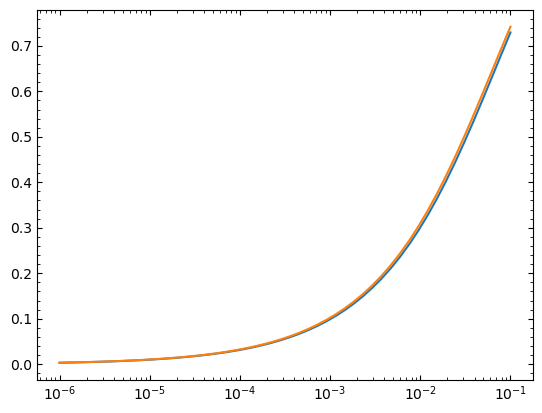

In [6]:
# YOUR CODE HERE
testValues = -np.logspace(-6, -1)

def findQm(Qk):
    return 0.314 - (3.71 * Qk)

def findQl(Qk, Qm):
    return 1 - (Qk + Qm)

def chiLSnumeric(Qk):
    
    Qm = findQm(Qk)
    Ql = findQl(Qk, Qm)
    zls = 1090
    
    def integrand(z):
        term1 = Qm * ((1 + z) ** 3)
        term2 = Qk * ((1 + z) ** 2)
        term3 = Ql
        return (term1 + term2 + term3) ** -0.5
    
    coefficient = np.sqrt(np.abs(Qk))
    
    integral = integ.quad_vec(integrand, 0, zls)[0]
    
    return coefficient * integral

def chiLSapprox(Qk):
    
    Qm = findQm(Qk)
    Ql = findQl(Qk, Qm)
    zls = 1090
    hypInputs = (1/6, 1/2, 7/6)
    
    coeff = 2 * np.sqrt(np.abs(Qk)/Qm)
    
    hyp1in = (Qm - 1) / Qm
    hyp1 = sf.hyp2f1(*hypInputs, hyp1in)
    
    hyp2in = (Qm - 1) / (Qm * ((1 + zls) ** 3))
    hyp2 = sf.hyp2f1(*hypInputs, hyp2in)
    
    hyp2coeff = 1 / (1 + zls)
    
    return coeff * (hyp1 - (hyp2coeff * hyp2))

numericOutputs = chiLSnumeric(testValues)
approxOutputs = chiLSapprox(testValues)

################### MAKE PRETTY ###################
plt.semilogx(np.abs(testValues), numericOutputs)
plt.semilogx(np.abs(testValues), approxOutputs)

In [7]:
Qktest = 0.08
Qmtest = findQm(Qktest)
Qltest = findQl(Qktest, Qmtest)

print(Qktest, Qmtest, Qltest)

assert np.isclose(Qktest + Qmtest + Qltest, 1)

print(chiLSnumeric(Qktest)) #Fails for Qk = 0.09 -> Qm < 0
print(chiLSapprox(Qktest))

0.08 0.017199999999999993 0.9028
2.355881338706468
2.793073482716258


By eye the approximation works very well over almost the entire range. To quantify the deviation calculate the fractional error in the approximation. *Accurately* determine the value of $\Omega_K$ (or $|\Omega_K|$) where the fractional error is $10^{-3}$. Produce a nice plot of the fractional error. Include a horizontal line for the target $10^{-3}$ accuracy. Include a vertical line at the value of $\Omega_K$ (or $|\Omega_K|$) at which the target accuracy is achieved. Finally, print out this value of $\Omega_K$ (or $|\Omega_K|$) for which the approximation is valid.

[0.03341005 0.03340998 0.03340988 0.03340976 0.0334096  0.03340941
 0.03340916 0.03340885 0.03340845 0.03340795 0.03340732 0.03340652
 0.03340551 0.03340423 0.03340261 0.03340056 0.03339798 0.0333947
 0.03339056 0.03338533 0.03337871 0.03337034 0.03335976 0.03334639
 0.0333295  0.03330815 0.03328119 0.03324715 0.03320419 0.03315001
 0.03308173 0.03299576 0.03288764 0.03275189 0.03258174 0.032369
 0.03210375 0.03177425 0.03136673 0.03086545 0.03025291 0.02951032
 0.02861855 0.02755942 0.02631749 0.02488216 0.02324974 0.02142519
 0.01942305 0.01726715]
[]


Text(0.5, 0, '$|\\Omega_K|$')

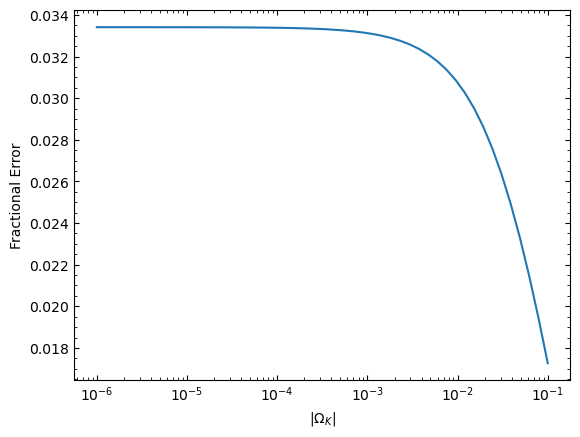

In [8]:
# YOUR CODE HERE
def efrac(actual, expected):
    return np.abs((actual - expected) / expected)

# Values differ by about 3% over the entire range...
deviation = efrac(approxOutputs, numericOutputs)
print(deviation)


goodValues = testValues[deviation < 1e-3]
print(goodValues)

plt.semilogx(np.abs(testValues), deviation)
plt.ylabel("Fractional Error")
plt.xlabel("$|\Omega_K|$")

## 3. Pendulum With a Moving Base (25 pts)

<div style='display: inline; float: right; padding-left: 3px'>
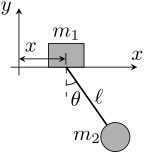
</div>

We have studied the simple pendulum in many ways, let's continue with another modification: let the base of the pendulum move. Suppose the base has a mass $m_1$ and is free to move without friction along the $x$-axis. Consider a pendulum of length $\ell$ and mass $m_2$ attached to this base which is shifted a distance $x$ along the $x$-axis, as shown in the figure at the right.

From Lagrangian mechanics we can easily derive the equations of motion for this system. To simplify the expressions let
$$ \mu \equiv \frac{m_2}{m_1 + m_2} \mbox{ and } \omega_0^2 \equiv \frac{g}{\ell}. $$
With these the Euler-Lagrange equations give the equations of motion as
\begin{align*}
  \ddot{x} + \mu \ell \ddot{\theta} \cos\theta - \mu \ell \dot{\theta}^2 \sin\theta & = 0, \\
  \ddot{x} \cos\theta + \ell \ddot{\theta} + \ell \omega_0^2 \sin\theta & = 0.
\end{align*}

This is a system of coupled second order differential equations. In fact, the second derivatives, $\ddot{x}$ and $\ddot{\theta}$ appear in both equations. To make this more useful we need to isolate the two second derivatives. To do so, solve this system to find one equation for $\ddot{x}$ and another for $\ddot{\theta}$, both in terms of $\dot{\theta}$, $\theta$, and constants, as appropriate. Typeset the expressions using LaTeX for $\ddot{x}$ and $\ddot{\theta}$ below.

To find an equation for $\ddot{x}$, the second equation was multiplied by $\mu\cos{\theta}$ and then subtracted from the first equation.

To find an equation for $\ddot{\theta}$, the first equation was multiplied by $\cos{\theta}$ and the second equation was subtracted.

Result:

$\begin{cases}
\ddot{x}(1-\mu\cos^2{\theta}) - \mu\ell(\dot{\theta}^2\sin{\theta}+\omega_0^2\sin{\theta}\cos{\theta}) = 0
\\
\ddot{\theta}(\mu\ell\cos^2{\theta}-\ell) - \ell(\mu\dot{\theta}^2\sin{\theta}\cos{\theta} + \omega_0^2\sin{\theta}) = 0
\end{cases}$

Now that the second derivatives have been separated we have a system of second order differential equations. We cannot directly use these! To proceed, convert these to a system of first order differential equations that can be used used by `solve_ivp` to evolve they system. Typeset those equations using LaTeX below and state what quantities require initial conditions in order to uniquely solve the problem.

Let $v = \dot{x}$ and let $\gamma = \dot{\theta}$. The following system of four equations can be produced:

$\begin{cases}
\dot{v} = \frac{\mu\ell(\gamma^2\sin{\theta}+\omega_0^2\sin{\theta}\cos{\theta})}{1-\mu\cos^2{\theta}}
\\
\dot{\gamma} = \frac{\ell(\mu\gamma^2\sin{\theta}\cos{\theta} + \omega_0^2\sin{\theta})}{\mu\ell\cos^2{\theta}-\ell}
\\
\dot{\theta} = \gamma
\\
\dot{x} = v
\end{cases}$

Note that the angular component of the motion is not dependent on the linear component. This makes sense, as the angular motion of the pendulum should not depend on any position or velocity offset of the base. However, if we wish to solve for all components of the motion, initial conditions must be specified for all four variables, $x, v, \theta,$ and $\gamma.$

Implement the system of equations in a form usable by `solve_ivp`.

In [9]:
def pendulum_eom(tf, y0, mu, l, omega0):
    '''
    (Sorry about the poor documentation! Just trying to keep things straight for myself.)
    
    INPUT:
    tf: Terminal t-value to evaluate the IVP at. t0 = 0.
    y0: [x, v, theta, gamma (angular velocity)]
    
    RETURNS:
    t: array of values
    y: 2d array of values
    '''
    
    def eom(t, y):
        [x, v, theta, gamma] = y
        x_ = v
        theta_ = gamma
        
        g_sq = gamma ** 2
        o_sq = omega0 ** 2
        
        cost = np.cos(theta)
        sint = np.sin(theta)
        
        v_num = mu * l * (g_sq * sint + o_sq * sint * cost)
        v_denom = 1 - (mu * (cost ** 2))
        v_ = v_num / v_denom
        
        gamma_num = l * (mu * g_sq * sint * cost + o_sq * sint)
        gamma_denom = mu * l * (cost **2) - l
        
        gamma_ = gamma_num / gamma_denom
        
        return [x_, v_, theta_, gamma_]
    
    solution = integ.solve_ivp(eom, (0, tf), y0)
    
    return solution.t, solution.y

### First Test

As a first test we notice the if $m_1 \gg m_2$ then $\mu \to 0$ and the system acts like a simple pendulum. We know the solution for a simple pendulum!

Choose $\mu=0$, $\omega_0 = \sqrt{2}$, and $\ell = 3.7$. Let the support start at rest at $x=0$. Finally, consider a pendulum that starts at rest with an initial amplitude of $5^\circ$. Since the amplitude is small we analytically know how its position and angular speed behave as a function of time.

Solve the system of differential equations with these conditions over two periods of oscillation. Verify for yourself that the support remains fixed with zero velocity. (Meaning that you do not need to include anything, but you should verify it for yourself as this is a consistency check which helps confirm that you have everything correct.) Produce a nice figure (or 2 figures if you do not want to put everything in 1 plot) showing the angular position and angular speed of the pendulum as a function of time both from the numerical solution and from the known analytic result.

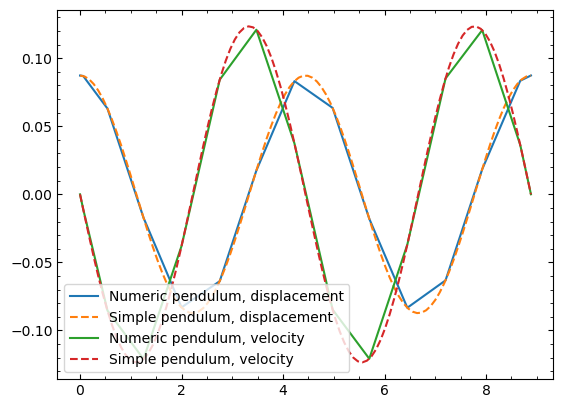

In [10]:
omega1 = np.sqrt(2)
period1 = np.pi * 2 / omega1
params1 = (0, 3.7, omega1)
y01 = [0, 0, np.radians(5), 0]
ts1, ys1 = pendulum_eom(period1 * 2, y01, *params1)

def simple_pendulum(t, theta0, omega):
    return theta0 * np.cos(t * omega)

def simple_pendulum_velocity(t, theta0, omega):
    return -omega * theta0 * np.sin(t * omega)

analytic_vals = np.linspace(0, period1 * 2, 100)
analytic1_theta = simple_pendulum(analytic_vals, np.radians(5), omega1)
analytic1_gamma = simple_pendulum_velocity(analytic_vals, np.radians(5), omega1)

plt.plot(ts1, ys1[2], label="Numeric pendulum, displacement")
plt.plot(analytic_vals, analytic1_theta, "--",label="Simple pendulum, displacement")
plt.plot(ts1, ys1[3], label="Numeric pendulum, velocity")
plt.plot(analytic_vals, analytic1_gamma, "--", label="Simple pendulum, velocity")
plt.legend(loc = "lower left")

### Second Test

The first test was very simple. There are many other tests we could do, but for lack of time we instead jump to a more interesting case. Suppose the support now has a finite mass but otherwise we will use the same parameters as above, that is, let $\mu = 0.2$, $\omega_0 = \sqrt{2}$, and $\ell = 3.7$. Again let the support start at $x=0$ but now let it have an initial speed of $1.1\,\mathrm{m/s}$. Also consider a large initial pendulum amplitude of $72^\circ$ and initial angular speed of zero.

Numerically solve the system now over a time of $6 \pi / \omega_0$ in seconds (i.e., three periods of simple pendulum motion) and plot the position of the base and the angular position of the pendulum (again in 1 or 2 figures, as you prefer).

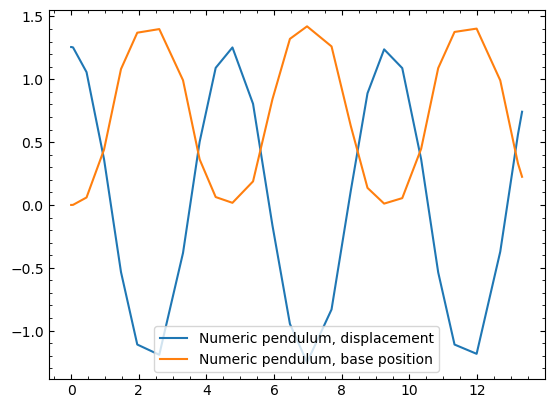

In [11]:
# YOUR CODE HERE
omega2 = np.sqrt(2)
period2 = np.pi * 2 / omega2
params2 = (0.2, 3.7, omega2)
y01 = [0, 0, np.radians(72), 0]
ts2, ys2 = pendulum_eom(period2 * 3, y01, *params2)

plt.plot(ts2, ys2[2], label="Numeric pendulum, displacement")
plt.plot(ts2, ys2[0], label="Numeric pendulum, base position")
plt.legend()

The above plot(s) should look reasonable, but we can do more. Since there is no force in the $x$-direction we know that the $x$-component of the momentum of the center of mass is conserved. Written in our notation the $x$-position and speed of the center of mass are given by
\begin{align*}
  x_{\mathrm{cm}} &= x + \mu \ell \sin\theta, \\
  v_{\mathrm{cm}, x} &= \dot{x} + \mu \ell \dot{\theta} \cos\theta.
\end{align*}

Since the $x$-component of the momentum is conserved we know that $v_{\mathrm{cm}, x}$ must be a constant and that $$ x_{\mathrm{cm}}(t) = x_{\mathrm{cm}}(0) + v_{\mathrm{cm}, x} t . $$
Further, at $t=0$ we can evaluate $v_{\mathrm{cm}, x}$ so we know its value and it must remain this value for all times.

From your numerical solution calculate $x_{\mathrm{cm}}$ and $v_{\mathrm{cm}, x}$ as a function of time. Verify for yourself that $v_{\mathrm{cm}, x}$ is constant and has the correct value. Finally produce a nice plot showing $x_{\mathrm{cm}}(t)$ from the numerical solution and from the known analytic solution. This should be a boring plot! (**Hint:** We started with $x(0)=0$ which means that $x_{\mathrm{cm}}(0) \neq 0$.)

In [12]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## Turn in the Exam

Turn in the exam following the procedure described at the top of the notebook.